In [3]:
import pandas as pd  #引入pandas用于读取数据
import matplotlib.pyplot as plt   #引入matplotlib用于画图
from matplotlib.colors import ListedColormap
import numpy as np   #引入numpy用于处理数据

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)    #获取数据
df.head()     #现实其中的前五条

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


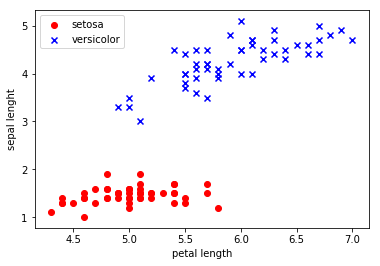

In [7]:
y=df.iloc[0:100,4].values         #获取前一百个样本的标签,函数iloc是按行取的意思
y=np.where(y=='Iris-setosa',-1,1)    #对标签进行重新整理：setosa（-1），versicolor（1）
X=df.iloc[0:100,[0,2]].values     #取每个样本的第一列（Sepal length）和第三列（petal length）作为特征
####对数据进行图形化显示
plt.scatter(X[:50,0],X[:50,1],color = 'red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal lenght')
plt.legend(loc='upper left')
plt.show()

In [14]:
class gzj(object):

    def __init__(self,eta=0.01,n_iter=10):
        self.eta=eta      #设置学习速率
        self.n_iter=n_iter   #设置样本个数
    
    #记录每次迭代的误分类样本数
    def fit(self,X,y):
        self.w_=np.zeros(1+X.shape[1])    #初始化权重，初始值为0，X.shape[1]获取X的列数【每个属性对应一个权重】
        self.errors_=[]     # 用于记录每一轮误分类样本数
        
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update=self.eta * (target-self.predict(xi)) #学习速率*标签之间的差值，若相同则为0，若不同则为-2或2
                self.w_[1:]+=update*xi*0.5   #更新权重=权重+学习速率*误分类的标签*x
                self.w_[0]+=update*0.5       #更新偏执项=偏执+学习速率*误分类的标签
                errors+=int(update !=0.0) # 统计个数
            self.errors_.append(errors)
        return self
   
    #计算X*w+b的值
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]   #计算X*w+b
    
    #根据X*w+b的值进行标记
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1)  #对样本进行标记

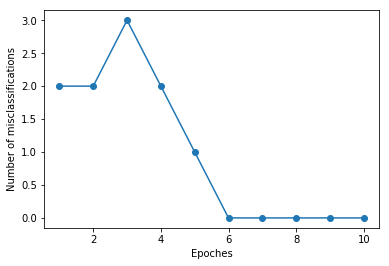

In [15]:
#####绘制随着迭代次数，误分类样本数的变化
ppn=gzj(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of misclassifications')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


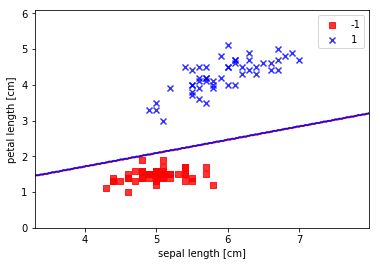

In [17]:
#绘制超平面
def plot_decision_region(X,y,classifier,resolution=0.02):
    # 设置标记和颜色的映射关系
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # 设置绘图区域
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx), marker=markers[idx],label=cl)

plot_decision_region(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upperleft')
plt.show()